Author: Mussa Ngosha

Topic: Monitoring chlorophyll-a concentration in the Western Indian Ocean from MODIS satellite data

Date: 09-01-2023

Introduction

This tutorial will show how to use satellite data with MODIS sensor to monitor the spatial and temporal chlorophyll-a concentration in the western Indian Ocean, Tanzania. The following are the steps to follow: The ERDDAP data server provides a simple, consistent way to subset and download environmental datasets in common file formats with options to make graphs and maps.

Import python packages

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import urllib.request 
import xarray as xr


Create ERDDAP URL link to download satellite data

In [ ]:
## create a erddap url link to access satellite data from the region of interest (ROI)

In [9]:
url="https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMH1chlamday.nc?chlorophyll%5B(2021-05-16T00:00:00Z):1:(2022-05-16T00:00:00Z)%5D%5B(-4.5):1:(-10.6)%5D%5B(38):1:(40)%5D" 
urllib.request.urlretrieve(url, "chla.nc")

('chla.nc', <http.client.HTTPMessage at 0x7fa230631670>)

Use xarray package to read satellite data with netcdf file format

In [10]:
ds_chla = xr.open_dataset('chla.nc',decode_cf=True)

Explore the DataArray for both Data and metadata

In [11]:
ds_chla

<xarray.Dataset>
Dimensions:      (time: 13, latitude: 148, longitude: 49)
Coordinates:
  * time         (time) datetime64[ns] 2021-05-16 2021-06-16 ... 2022-05-16
  * latitude     (latitude) float32 -4.479 -4.521 -4.563 ... -10.52 -10.56 -10.6
  * longitude    (longitude) float32 37.98 38.02 38.06 38.1 ... 39.9 39.94 39.98
Data variables:
    chlorophyll  (time, latitude, longitude) float32 ...
Attributes: (12/51)
    _lastModified:                     2022-06-18T05:03:50.000Z
    cdm_data_type:                     Grid
    Conventions:                       CF-1.6, COARDS, ACDD-1.3
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    creator_name:                      NASA/GSFC/OBPG
    creator_type:                      group
    ...                                ...
    temporal_range:                    month
    testOutOfDate:                     now-90days
    time_coverage_end:                 2022-05-16T00:00:00Z
    time_coverage_start:               2021-05-16T00:00:00Z
    title:                             Chlorophyll-a, Aqua MODIS, NPP, L3SMI,...
    Westernmost_Easting:               37.97917

Extract a variable fro the dataset

In [13]:
ds_chla.chlorophyll

<xarray.DataArray 'chlorophyll' (time: 13, latitude: 148, longitude: 49)>
[94276 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2021-05-16 2021-06-16 ... 2022-05-16
  * latitude   (latitude) float32 -4.479 -4.521 -4.563 ... -10.52 -10.56 -10.6
  * longitude  (longitude) float32 37.98 38.02 38.06 38.1 ... 39.9 39.94 39.98
Attributes:
    colorBarMaximum:  30.0
    colorBarMinimum:  0.03
    colorBarScale:    Log
    ioos_category:    Ocean Color
    long_name:        Mean Chlorophyll a Concentration
    references:       Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a a...
    standard_name:    concentration_of_chlorophyll_in_sea_water
    units:            mg m-3
    valid_max:        100.0
    valid_min:        0.001

Check the dimension of data variables

In [14]:
ds_chla.chlorophyll.dims

('time', 'latitude', 'longitude')

In [ ]:
## Seasonal data

In [16]:
season = ds_chla.groupby('time.season').mean()
season


<xarray.Dataset>
Dimensions:      (latitude: 148, longitude: 49, season: 4)
Coordinates:
  * latitude     (latitude) float32 -4.479 -4.521 -4.563 ... -10.52 -10.56 -10.6
  * longitude    (longitude) float32 37.98 38.02 38.06 38.1 ... 39.9 39.94 39.98
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    chlorophyll  (season, latitude, longitude) float32 nan nan nan ... nan nan
Attributes: (12/51)
    _lastModified:                     2022-06-18T05:03:50.000Z
    cdm_data_type:                     Grid
    Conventions:                       CF-1.6, COARDS, ACDD-1.3
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    creator_name:                      NASA/GSFC/OBPG
    creator_type:                      group
    ...                                ...
    temporal_range:                    month
    testOutOfDate:                     now-90days
    time_coverage_end:                 2022-05-16T00:00:00Z
    time_coverage_start:               2021-05-16T00:00:00Z
    title:                             Chlorophyll-a, Aqua MODIS, NPP, L3SMI,...
    Westernmost_Easting:               37.97917

plotting graphs

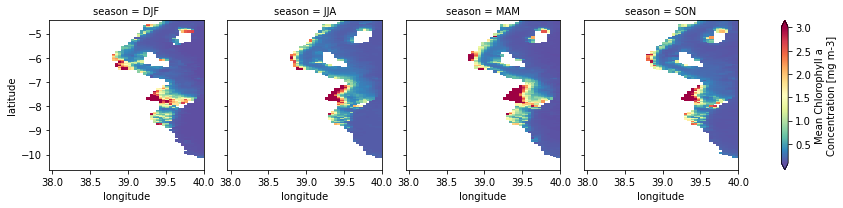

In [50]:
season.chlorophyll.plot(col = 'season',col_wrap=4, robust=True,  cmap='Spectral_r')
plt.show()

One month chl-a monitoring 

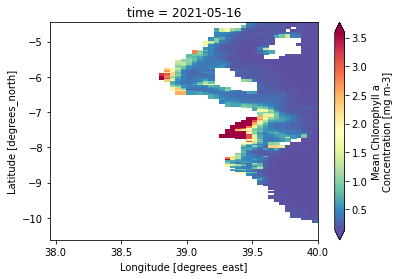

In [58]:
ds_chla.chlorophyll[0].plot(col_wrap=4, robust=True,  cmap='Spectral_r')
plt.show()

Monthly monitoring of chla trends 

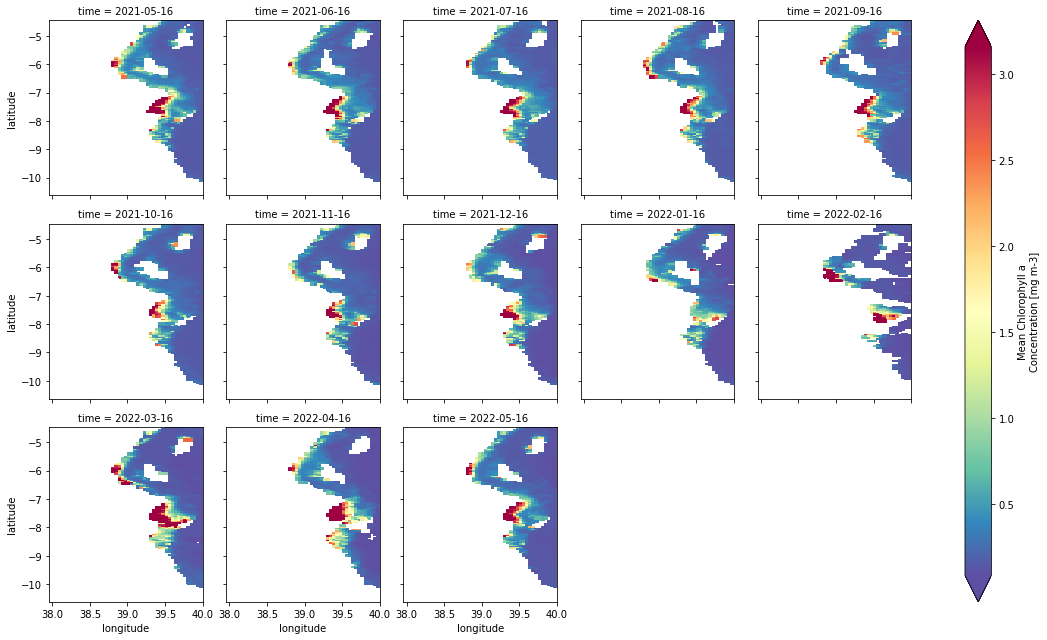

In [63]:
ds_chla.chlorophyll.plot(col = 'time', col_wrap=5,robust=True,  cmap='Spectral_r');

## plt.savefig('test_022.jpg',dpi=300)

Contours plots

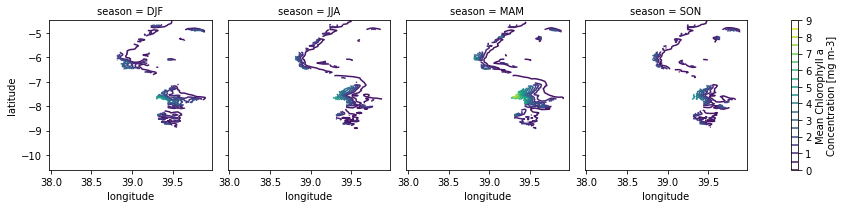

In [64]:
# contours
season.chlorophyll.plot.contour(col="season", levels=20, add_colorbar=True)
plt.show()